In [54]:
# Importing libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import mean_absolute_error

### Code for predicting on a single image

In [2]:
# Loading the model
age_model = cv2.dnn.readNetFromCaffe("age.prototxt", "dex_chalearn_iccv2015.caffemodel")

In [37]:
img = cv2.imread("../../../team/course-teams/2023-msia431/team01/face_age_data/face_age_balanced_test/022/1187.png")

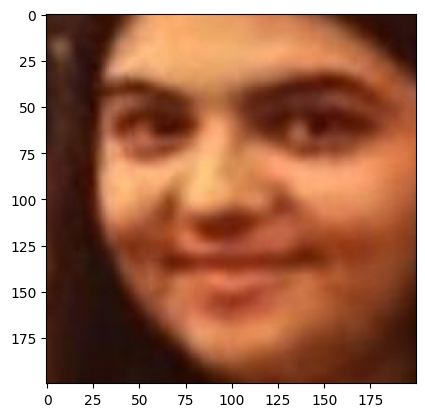

In [38]:
plt.imshow(img[:,:,::-1])

In [39]:
img.shape

(200, 200, 3)

In [40]:
img = cv2.dnn.blobFromImage(img)

In [41]:
img.shape

(1, 3, 200, 200)

In [42]:
age_model.setInput(img)
age_result = age_model.forward()

In [43]:
output_indexes = np.array([i for i in range(0, 101)])
apparent_predictions = round(np.sum(age_result * output_indexes), 2)

In [44]:
apparent_predictions

33.97

### Code to evaluate model on test set

In [47]:
# Define the base path
base_path = "../../../team/course-teams/2023-msia431/team01/face_age_data/face_age_balanced_test/"

In [48]:
# Initialize two empty lists to hold the ground truth and predicted values
ground_truths = []
predictions = []

In [49]:
# Loop over folder names
for i in range(1, 91):
    # Format the folder name to have three digits, i.e., "001", "002", ..., "090"
    folder_name = str(i).zfill(3)
    
    # Create the full directory path
    dir_path = os.path.join(base_path, folder_name)
    
    # Get the list of files in the directory
    file_list = os.listdir(dir_path)
    
    # Loop over files in the directory
    for file_name in file_list:
        # Create the full file path
        file_path = os.path.join(dir_path, file_name)
        
        # Read the image
        img = cv2.imread(file_path)
        
        # Preprocess the image
        img_blob = cv2.dnn.blobFromImage(img)
        
        # Set the input to the model
        age_model.setInput(img_blob)
        
        # Get the prediction from the model
        age_result = age_model.forward()
        
        # Generate indexes and calculate the predicted age
        output_indexes = np.array([i for i in range(0, 101)])
        apparent_predictions = round(np.sum(age_result * output_indexes), 2)
        
        # Append the ground truth and prediction to the respective lists
        ground_truths.append(int(folder_name))
        predictions.append(apparent_predictions)


In [50]:
# Now you have the ground truth ages and predictions
print("Ground Truths:", ground_truths)
print("Predictions:", predictions)

Ground Truths: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 

In [51]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(ground_truths, predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 9.79282857142857


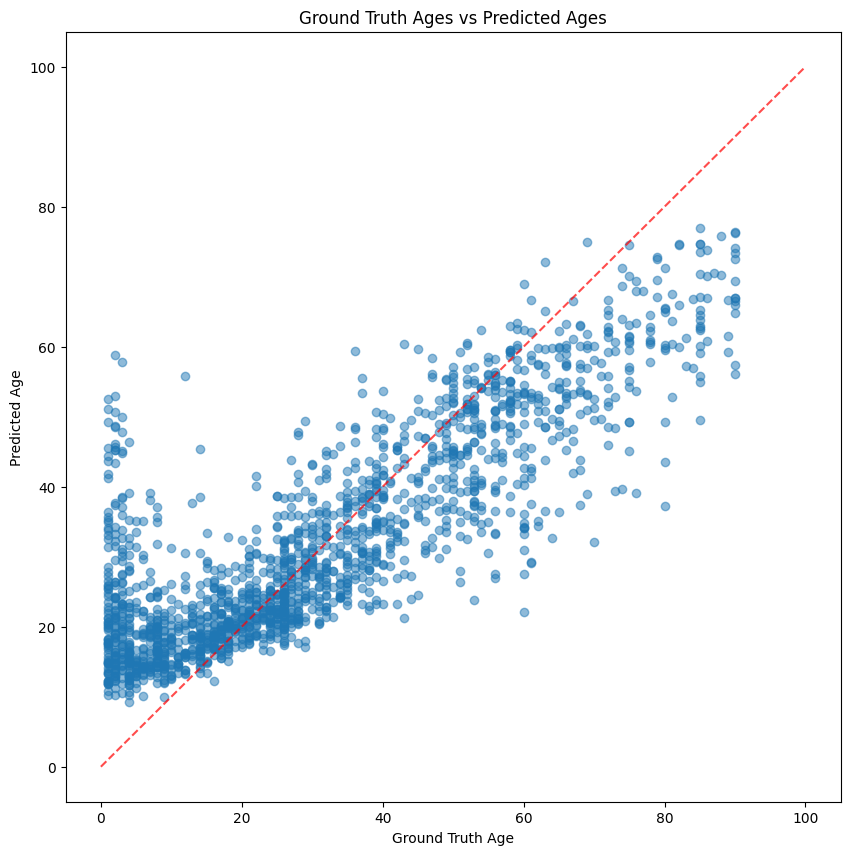

In [52]:
# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(ground_truths, predictions, alpha=0.5)
plt.plot(range(0, 101), range(0, 101), '--r', alpha=0.7)  # draw a diagonal line

# Set the title and labels
plt.title('Ground Truth Ages vs Predicted Ages')
plt.xlabel('Ground Truth Age')
plt.ylabel('Predicted Age')

# Show the plot
plt.show()


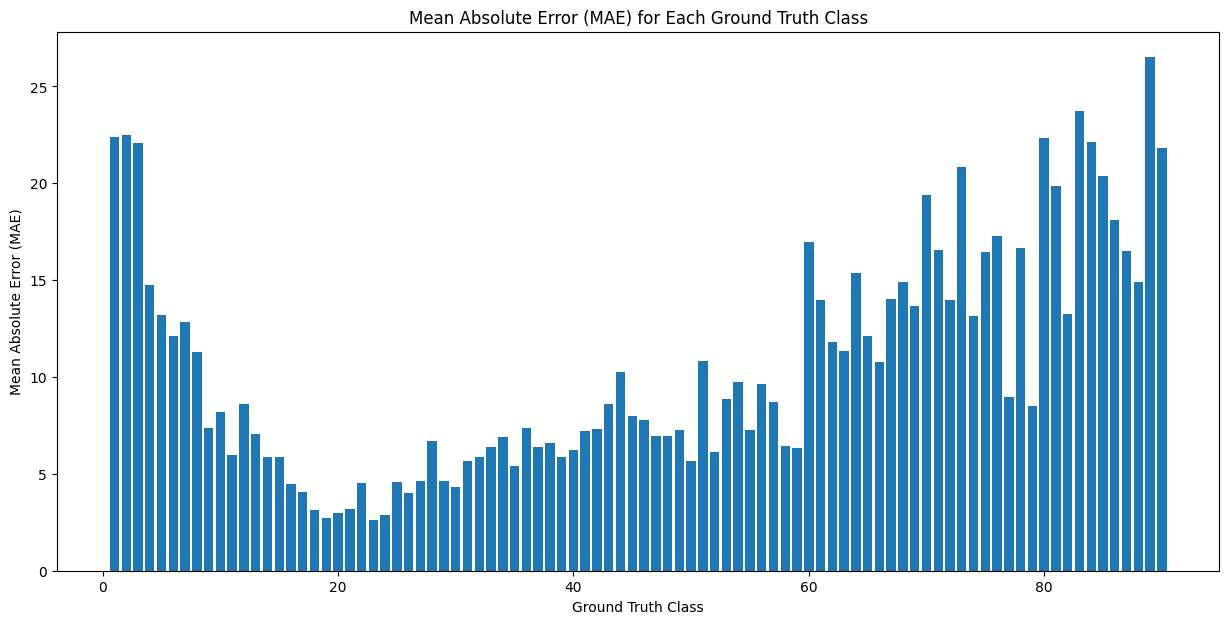

In [55]:
# Initialize a dictionary to hold the absolute errors for each class
errors = defaultdict(list)

# Loop over ground truth and predicted values
for gt, pred in zip(ground_truths, predictions):
    # Calculate the absolute error and append it to the list for this class
    errors[gt].append(abs(gt - pred))

# Calculate the mean absolute error for each class
mae_per_class = {k: np.mean(v) for k, v in errors.items()}

# Create lists of classes and MAEs
classes = list(mae_per_class.keys())
maes = list(mae_per_class.values())

# Create a bar plot
plt.figure(figsize=(15, 7))
plt.bar(classes, maes)

# Set the title and labels
plt.title('Mean Absolute Error (MAE) for Each Ground Truth Class')
plt.xlabel('Ground Truth Class')
plt.ylabel('Mean Absolute Error (MAE)')

# Show the plot
plt.show()
